In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('merged_data_training.csv',index_col=0)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16094 non-null  object 
 1   channel_sales             11877 non-null  object 
 2   cons_12m                  16094 non-null  int64  
 3   cons_gas_12m              16094 non-null  int64  
 4   cons_last_month           16094 non-null  int64  
 5   date_activ                16094 non-null  object 
 6   date_end                  16092 non-null  object 
 7   date_modif_prod           15938 non-null  object 
 8   date_renewal              16054 non-null  object 
 9   forecast_cons_12m         16094 non-null  float64
 10  forecast_cons_year        16094 non-null  int64  
 11  forecast_discount_energy  15970 non-null  float64
 12  forecast_meter_rent_12m   16094 non-null  float64
 13  forecast_price_energy_p1  15970 non-null  float64
 14  foreca

In [4]:
# Taking average of price_p1_var,price_p2_var,price_p3_var and average of price_p1_fix,price_p2_fix,price_p3_fix.
df['avg_price_energy']=(df.price_p1_var + df.price_p2_var + df.price_p3_var)/3
df.drop(['price_p1_var','price_p2_var','price_p3_var'],axis=1,inplace=True)
df['avg_price_power']=(df.price_p1_fix + df.price_p2_fix + df.price_p3_fix)/3
df.drop(['price_p1_fix','price_p2_fix','price_p3_fix'],axis=1,inplace=True)

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,avg_price_energy,avg_price_power
count,1.609400e+04,1.609400e+04,1.609400e+04,16094.000000,16094.000000,15970.000000,16094.000000,15970.000000,15970.000000,15970.000000,16094.000000,16081.000000,16081.000000,16094.000000,16079.000000,16094.000000,16091.000000,16094.000000,16094.000000,16094.000000
mean,1.948281e+05,3.191560e+04,1.946395e+04,2370.850537,1907.584255,0.991547,70.318682,0.135901,0.052951,43.533496,196.147819,22.465077,21.462994,1.347831,217.934866,5.030384,20.595132,0.099043,0.075359,20.156804
std,6.795540e+05,1.775991e+05,8.236159e+04,4035.249847,5257.648434,5.160969,79.024274,0.026252,0.048617,5.212252,494.392863,23.701025,27.918053,1.459894,366.681622,1.675468,21.756725,0.298729,0.024589,6.799253
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.909000e+03,0.000000e+00,0.000000e+00,513.370000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.000000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,0.049878,14.780335
50%,1.533450e+04,0.000000e+00,9.010000e+02,1179.425000,378.500000,0.000000,19.440000,0.142881,0.086163,44.311378,44.530000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,0.084637,14.814903
75%,5.022450e+04,0.000000e+00,4.127000e+03,2692.132500,1994.750000,0.000000,131.470000,0.146348,0.098837,44.311378,218.130000,29.640000,29.640000,1.000000,275.785000,6.000000,19.800000,0.000000,0.099359,27.098285
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,0.148651,34.677296


### Handling missing values in channel_sales

In [6]:
df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7376
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [7]:
df.groupby(['channel_sales'])['churn'].mean()

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu    0.000000
ewpakwlliwisiwduibdlfmalxowmwpci    0.084886
fixdbufsefwooaasfcxdxadsiekoceaa    0.000000
foosdfpfkusacimwkcsosbicdxkicaua    0.125000
lmkebamcaaclubfxadlmueccxoimlema    0.055958
sddiedcslfslkckwlfkdpoeeailfpeds    0.000000
usilxuppasemubllopkaafesmlibmsdf    0.103878
Name: churn, dtype: float64

In [8]:
df[df.channel_sales.isnull()].churn.mean()

0.07683187099834005

In [9]:
# There are 4217 rows in df for which channel_sales value is null.
# We cannot put mode value of channeL_sales in place of null values, as we can see that clients having channel_sales as 
# 'foosdfpfkusacimwkcsosbicdxkicaua' are 12.5% likely to churn, while clients having null values of channel_sales, are only
# 7.6% likely to churn.
df.loc[df.channel_sales.isnull()]['churn'].count()

4217

In [10]:
df.channel_sales.loc[df.channel_sales.isnull()]='unknown'
df.channel_sales.isnull().sum()

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

### converting has_gas into 0s and 1s.

In [11]:
df.has_gas.replace(['f','t'],[0,1],inplace=True)

In [12]:
df.has_gas.dtype

dtype('int64')

### converting all 'date...' columns to DateTime datatype.

In [13]:
df.date_activ=pd.to_datetime(df.date_activ,format='%Y-%m-%d')
df.date_end=pd.to_datetime(df.date_end,format='%Y-%m-%d')
df.date_modif_prod=pd.to_datetime(df.date_modif_prod,format='%Y-%m-%d')
df.date_renewal=pd.to_datetime(df.date_renewal,format='%Y-%m-%d')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16094 non-null  object        
 1   channel_sales             16094 non-null  object        
 2   cons_12m                  16094 non-null  int64         
 3   cons_gas_12m              16094 non-null  int64         
 4   cons_last_month           16094 non-null  int64         
 5   date_activ                16094 non-null  datetime64[ns]
 6   date_end                  16092 non-null  datetime64[ns]
 7   date_modif_prod           15938 non-null  datetime64[ns]
 8   date_renewal              16054 non-null  datetime64[ns]
 9   forecast_cons_12m         16094 non-null  float64       
 10  forecast_cons_year        16094 non-null  int64         
 11  forecast_discount_energy  15970 non-null  float64       
 12  forecast_meter_ren

In [15]:
df.origin_up

0        ldkssxwpmemidmecebumciepifcamkci
1        lxidpiddsbxsbosboudacockeimpuepw
2        kamkkxfxxuwbdslkwifmmcsiusiuosws
3        kamkkxfxxuwbdslkwifmmcsiusiuosws
4        kamkkxfxxuwbdslkwifmmcsiusiuosws
                       ...               
16089    lxidpiddsbxsbosboudacockeimpuepw
16090    lxidpiddsbxsbosboudacockeimpuepw
16091    lxidpiddsbxsbosboudacockeimpuepw
16092    lxidpiddsbxsbosboudacockeimpuepw
16093    ldkssxwpmemidmecebumciepifcamkci
Name: origin_up, Length: 16094, dtype: object

In [16]:
df.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7824
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3663
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [17]:
df.origin_up.isnull().sum()

87

In [18]:
# As there are only 87 missing values in origin_up column so we replace it with mode value of origin_up.
df.origin_up.loc[df.origin_up.isnull()]='lxidpiddsbxsbosboudacockeimpuepw'

In [19]:
df.origin_up.isnull().sum()

0

In [20]:
df.origin_up.value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7911
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3663
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

## One hot encoding to convert channel_sales, origin_up columns to categorical feature.

In [21]:
df_encoded=pd.get_dummies(data=df,columns=['origin_up','channel_sales'],drop_first=True)

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   id                                              16094 non-null  object        
 1   cons_12m                                        16094 non-null  int64         
 2   cons_gas_12m                                    16094 non-null  int64         
 3   cons_last_month                                 16094 non-null  int64         
 4   date_activ                                      16094 non-null  datetime64[ns]
 5   date_end                                        16092 non-null  datetime64[ns]
 6   date_modif_prod                                 15938 non-null  datetime64[ns]
 7   date_renewal                                    16054 non-null  datetime64[ns]
 8   forecast_cons_12m                             

In [23]:
## As we can see that there are only a very few rows having a particular value of channel_sales, origin_up, therefore we can
# easily drop that feature after one hot encoding.

In [24]:
df_encoded.drop(['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa'
                ,'origin_up_usapbepcfoloekilkwsdiboslwaxobdp'],axis=1,inplace=True)

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   id                                              16094 non-null  object        
 1   cons_12m                                        16094 non-null  int64         
 2   cons_gas_12m                                    16094 non-null  int64         
 3   cons_last_month                                 16094 non-null  int64         
 4   date_activ                                      16094 non-null  datetime64[ns]
 5   date_end                                        16092 non-null  datetime64[ns]
 6   date_modif_prod                                 15938 non-null  datetime64[ns]
 7   date_renewal                                    16054 non-null  datetime64[ns]
 8   forecast_cons_12m                             

## We can convert all 'date...' columns to float data-type by (year_num)+(month number/100).

In [26]:
df_encoded['date_end']=(df_encoded.date_end.dt.year+df_encoded.date_end.dt.month/100)
df_encoded['date_activ']=(df_encoded.date_activ.dt.year+df_encoded.date_activ.dt.month/100)
df_encoded['date_modif_prod']=(df_encoded.date_modif_prod.dt.year+df_encoded.date_modif_prod.dt.month/100)
df_encoded['date_renewal']=(df_encoded.date_renewal.dt.year+df_encoded.date_renewal.dt.month/100)

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              16094 non-null  object 
 1   cons_12m                                        16094 non-null  int64  
 2   cons_gas_12m                                    16094 non-null  int64  
 3   cons_last_month                                 16094 non-null  int64  
 4   date_activ                                      16094 non-null  float64
 5   date_end                                        16092 non-null  float64
 6   date_modif_prod                                 15938 non-null  float64
 7   date_renewal                                    16054 non-null  float64
 8   forecast_cons_12m                               16094 non-null  float64
 9   forecast_cons_year                     

In [28]:
df_encoded.isnull().sum()

id                                                  0
cons_12m                                            0
cons_gas_12m                                        0
cons_last_month                                     0
date_activ                                          0
date_end                                            2
date_modif_prod                                   156
date_renewal                                       40
forecast_cons_12m                                   0
forecast_cons_year                                  0
forecast_discount_energy                          124
forecast_meter_rent_12m                             0
forecast_price_energy_p1                          124
forecast_price_energy_p2                          124
forecast_price_pow_p1                             124
has_gas                                             0
imp_cons                                            0
margin_gross_pow_ele                               13
margin_net_pow_ele          

In [29]:
df_encoded[df_encoded.churn==0].describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,avg_price_energy,avg_price_power,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_unknown,channel_sales_usilxuppasemubllopkaafesmlibmsdf
count,1.450000e+04,1.450000e+04,1.450000e+04,14500.000000,14498.000000,14368.000000,14460.000000,14500.000000,14500.000000,14421.000000,...,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000,14500.000000
mean,2.064827e+05,3.432167e+04,2.074478e+04,2010.569592,2016.126971,2012.444403,2015.108698,2360.822402,1902.673241,0.970668,...,0.075065,20.069002,0.293241,0.230966,0.475586,0.060966,0.445103,0.134966,0.268483,0.089241
std,7.084792e+05,1.860815e+05,8.614340e+04,1.710167,0.243000,2.526167,0.292191,3985.154657,5001.257411,5.112158,...,0.024615,6.817817,0.455264,0.421465,0.499421,0.239275,0.496994,0.341699,0.443185,0.285102
min,-1.169570e+05,-3.037000e+03,-9.138600e+04,2000.070000,2006.080000,2000.070000,2013.060000,-16689.260000,-85627.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.919500e+03,0.000000e+00,0.000000e+00,2010.010000,2016.040000,2010.070000,2015.040000,514.797500,0.000000,0.000000,...,0.049867,14.780335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.536600e+04,0.000000e+00,9.255000e+02,2011.020000,2016.070000,2013.040000,2015.070000,1178.970000,383.000000,0.000000,...,0.084458,14.814903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.066200e+04,0.000000e+00,4.209250e+03,2012.040000,2016.100000,2015.050000,2015.100000,2687.375000,2004.500000,0.000000,...,0.099359,27.098285,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2014.090000,2017.060000,2016.010000,2016.010000,103801.930000,175375.000000,50.000000,...,0.148651,34.677296,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_encoded[df_encoded.churn==1].describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,avg_price_energy,avg_price_power,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_unknown,channel_sales_usilxuppasemubllopkaafesmlibmsdf
count,1.594000e+03,1594.000000,1594.000000,1594.000000,1594.000000,1570.000000,1594.000000,1594.000000,1594.000000,1549.000000,...,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,8.881104e+04,10028.495609,7812.744040,2010.994479,2016.134034,2012.871783,2015.116186,2462.072597,1952.257842,1.185926,...,0.078039,20.955504,0.166248,0.196989,0.636763,0.051443,0.578419,0.072773,0.203262,0.094103
std,2.901282e+05,54328.546490,28927.862111,1.650324,0.240659,2.313743,0.281381,4465.549633,7183.182636,5.593027,...,0.024195,6.576435,0.372420,0.397849,0.481083,0.220969,0.493967,0.259845,0.402552,0.292063
min,-1.252760e+05,-617.000000,-11825.000000,2003.060000,2016.010000,2003.060000,2013.100000,-10037.370000,-19057.000000,0.000000,...,0.036473,12.105123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.840250e+03,0.000000,0.000000,2010.050000,2016.040000,2011.090000,2015.040000,501.995000,0.000000,0.000000,...,0.049913,14.785273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.513500e+04,0.000000,748.500000,2011.110000,2016.070000,2013.110000,2015.070000,1189.135000,347.500000,0.000000,...,0.085722,15.204245,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.626125e+04,0.000000,3477.000000,2012.070000,2016.100000,2015.050000,2015.100000,2761.282500,1916.250000,0.000000,...,0.100129,27.107336,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.012564e+06,828344.000000,469898.000000,2013.110000,2017.010000,2016.010000,2016.010000,66521.260000,155432.000000,30.000000,...,0.138830,34.677296,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## We can see difference between median() values for 'date...' columns where churn is 0 and 1, therefore I will replace null values in 'date...' columns based on churn value of that row.

In [31]:
df_encoded.date_end.fillna(df_encoded.date_end.median(),inplace=True)

In [32]:
df_encoded.date_modif_prod.loc[(df_encoded.date_modif_prod.isnull())&(
    df_encoded.churn==1)]=df_encoded.date_modif_prod.loc[(df_encoded.churn==1)].median()

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
df_encoded.date_modif_prod.loc[(df_encoded.date_modif_prod.isnull())&(
    df_encoded.churn==0)]=df_encoded.date_modif_prod.loc[(df_encoded.churn==0)].median()

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
df_encoded.date_modif_prod.isnull().sum()

0

In [35]:
df_encoded.date_renewal.loc[(df_encoded.date_renewal.isnull())&(
    df_encoded.churn==1)]=df_encoded.date_renewal.loc[(df_encoded.churn==1)].median()
df_encoded.date_renewal.loc[(df_encoded.date_renewal.isnull())&(
    df_encoded.churn==0)]=df_encoded.date_renewal.loc[(df_encoded.churn==0)].median()

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
df_encoded.date_renewal.isnull().sum()

0

In [37]:
df_encoded.isnull().sum()

id                                                  0
cons_12m                                            0
cons_gas_12m                                        0
cons_last_month                                     0
date_activ                                          0
date_end                                            0
date_modif_prod                                     0
date_renewal                                        0
forecast_cons_12m                                   0
forecast_cons_year                                  0
forecast_discount_energy                          124
forecast_meter_rent_12m                             0
forecast_price_energy_p1                          124
forecast_price_energy_p2                          124
forecast_price_pow_p1                             124
has_gas                                             0
imp_cons                                            0
margin_gross_pow_ele                               13
margin_net_pow_ele          

## Now replacing null values in other columns with mean() values, as there are very few null values.

<AxesSubplot:xlabel='churn', ylabel='forecast_discount_energy'>

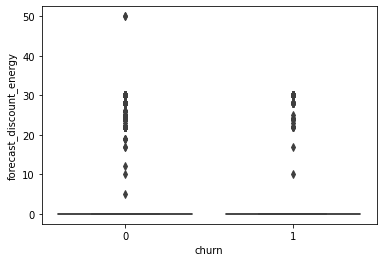

In [38]:
sns.boxplot(x='churn',y='forecast_discount_energy',data=df_encoded)

In [39]:
df_encoded.forecast_discount_energy.loc[df_encoded.forecast_discount_energy.isnull()]=0

c:\users\91709\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='churn', ylabel='forecast_price_energy_p1'>

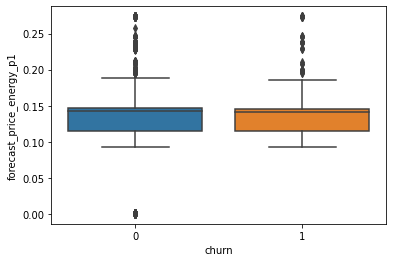

In [40]:
sns.boxplot(x='churn',y='forecast_price_energy_p1',data=df_encoded)

In [41]:
df_encoded.forecast_price_energy_p1.fillna(df_encoded.forecast_price_energy_p1.median(),inplace=True)

<AxesSubplot:xlabel='churn', ylabel='forecast_price_energy_p2'>

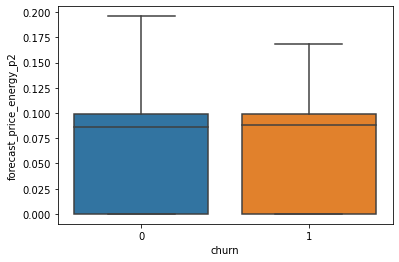

In [42]:
sns.boxplot(x='churn',y='forecast_price_energy_p2',data=df_encoded)

In [43]:
df_encoded.forecast_price_energy_p2.fillna(df_encoded.forecast_price_energy_p2.median(),inplace=True)

<AxesSubplot:xlabel='churn', ylabel='forecast_price_pow_p1'>

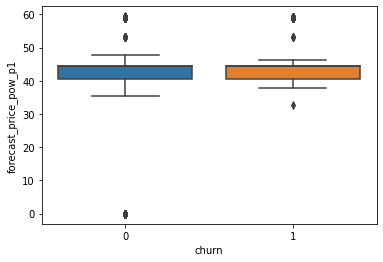

In [44]:
sns.boxplot(x='churn',y='forecast_price_pow_p1',data=df_encoded)

In [45]:
df_encoded.forecast_price_pow_p1.fillna(df_encoded.forecast_price_pow_p1.median(),inplace=True)

<AxesSubplot:xlabel='churn', ylabel='margin_gross_pow_ele'>

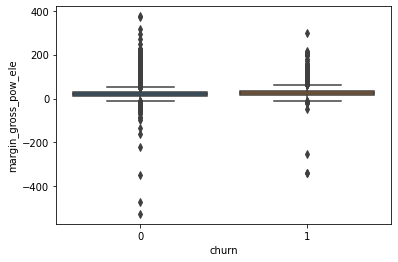

In [46]:
sns.boxplot(x='churn',y='margin_gross_pow_ele',data=df_encoded)

<AxesSubplot:xlabel='churn', ylabel='margin_net_pow_ele'>

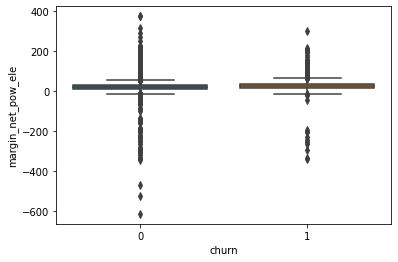

In [47]:
sns.boxplot(x='churn',y='margin_net_pow_ele',data=df_encoded)

<AxesSubplot:xlabel='churn', ylabel='net_margin'>

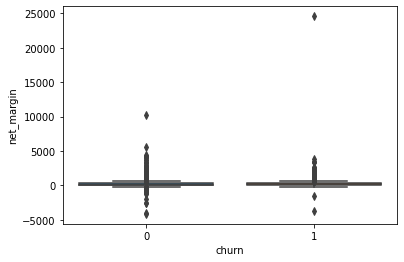

In [48]:
sns.boxplot(x='churn',y='net_margin',data=df_encoded)

<AxesSubplot:xlabel='churn', ylabel='pow_max'>

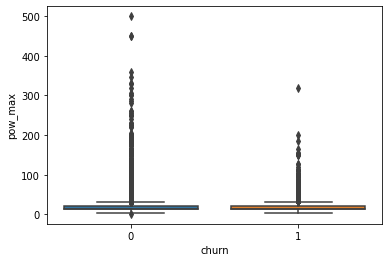

In [49]:
sns.boxplot(x='churn',y='pow_max',data=df_encoded)

In [50]:
df_encoded.pow_max.fillna(df_encoded.pow_max.median(),inplace=True)
df_encoded.net_margin.fillna(df_encoded.net_margin.median(),inplace=True)
df_encoded.margin_net_pow_ele.fillna(df_encoded.margin_net_pow_ele.median(),inplace=True)
df_encoded.margin_gross_pow_ele.fillna(df_encoded.margin_gross_pow_ele.median(),inplace=True)

In [51]:
df_encoded.isnull().sum().sum()

0

In [52]:
df_encoded.to_csv('cleaned_data_for_ml_modelling.csv')